11/03/25
# Discretización de variables

1. Discretización por intervales de igual Amplitud
2. Discretización por Cuantil
3. Discretización por Kmeans
4. Discretización por entropia

Tareas complejas de mineria de datos o aprendizaje autómatico, pueden demorar mucho tiempo en ejecutarse sobre el conjunto de datos complejos, ante esta situación surge la opción de la reducción de la dimensionalidad, cuyo objetivo es buscar una representación reducida del conjunto de datos que es mucho más pqueña en valumen, pero produce los mismos (o casi iguales) resultados. Las estrategias de reducción de datos son:

* Agregación del cubo de datos
* Discretización y reducción de la dimensionalidad

## Métodos Top-Down
Se inicia con una lista vacía de puntos de corte y se continuan agregando nuevos puntos a la lista "separando" los intervalos mientras la discretización progresa.

## Métodos Bottom-Up
Se inicia con la lista completa de todos los valores continuos de la variabo como puntos de corte y se eliminan algunos de ellos "juntando" los intercalos mientras la Discretización progresa

**Esto puede dar origen a una nueva Discretización**

## Discretización dinámica
Algunos algoritmos de clasificación tienen incorporados mecanismos para discretizar atributos continuos (por ejemplo, árboles de decisión). Los atributos continuos son discretizados durante el proceso de clasificación.

## Discretización Estática
Es un paso más en el *preprocesamiento de datos*. Los atributos continuos son previamente discretizados antes de la tarea de clasificación

**Cosas a considerar:**
- No existe una ventaja clara de algunos de los métodos
- También es conocido como "Binning".

# Supervisados vs No Supervisados
**Los métodos supervisados**, solo son aplicables cuando se trabaja con datos que están divididas en clases. Estos métodos utilizan la información de la clase cuando se seleccionan los puntos de corte en la discretización.

**Los métoodos No supervisados**, no utilizan la información de la clase.

**Los métodos supervisados** pueden además ser caracterizados como basados en error, basados en entropia o basados en estadística:

Los basadoe en error aplican un clasidicador a los datos transformados y seleccionan los intervalos que minimizan el error en el conjunto de entrenamiento. En contraste, los métodos basados en entropía y los basados en estadísticas evalúan respecto entre los intervalos de la clase.

Por ejemplo: la entropia cruzada es una popular función de perdida en el aprendizaje autómatico para medir el rendimiento de un modelo de clasificación. Es decir, mide la diferencia entre la distribución de la probabilidad descubierta de un modelo de clasificación y los valores predichos.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
os.chdir("/home/manuel/Documentos/CLases_MCD&SIS/data_11")

In [4]:
df = pd.read_csv("data.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   genero     19375 non-null  int64
 1   est_civil  19375 non-null  int64
 2   tpers      19375 non-null  int64
 3   cal        19375 non-null  int64
 4   edad       19375 non-null  int64
 5   clase      19375 non-null  int64
dtypes: int64(6)
memory usage: 908.3 KB


# Método Sturges para discretizar
- Sturges: 
$$k = 1 + \log_2(n) = 1 + 3.322 \log_{10}(n)$$
Donde $k$ es el número de clases

    $n$ es el número de datos de la población

- Friedman-Diaconis:
  
  $$C= 2 \times \frac{RIC}{n^{\frac{1}{3}}}$$,
  donde $RIC$ es el intervalo intercuartilico
- Scott:
  $$C= 3.5 \frac{s}{n^{\frac{1}{3}}}$$
-> Para Friedman - Diacononis y Scott luego se calcula:
  $$k = \frac{(Xmax - Xmin)}{C}$$

Proceso:

- Es similar a la elaboración de tablas de frecuencia y de contingencia
- Se divide el rango de la variable en $k$ intervalos de igual tamaño
- Se divide $xmin$ y $xmax$ el valor mínimo y máximo de la variable, el ancho de 1 intervalo es:
  $$C = \frac{(Xmax- X min)}{k}$$
- Donde k es determinado por una regla
- Luego los puntos de corte son dados por:
  $$Xmin + C, Xmin+2c,...Xmin + (k-1)C$$

**Desventajas:** no supervisado, sensible a outfiliers ventajas: Fácil de interpretar. Produce una abstracción de los datos razonables.

In [6]:
from sklearn.preprocessing import KBinsDiscretizer
import math

In [7]:
# implementando struges
n = len(df)
k = 1 + math.log2(n)
k = round(k,0)
k

15.0

In [8]:
xmin = df.edad.min()
xmax = df.edad.max()

In [9]:
# Amplitud de la clase
c = (xmax - xmin)/ k
c

6.0

In [10]:
xmin,xmin + c, xmin + 2*c, xmin + 3*c,'...', xmin+(k-1)*c

(0, 6.0, 12.0, 18.0, '...', 84.0)

Verificar las cuáles son las clases formadas:

In [12]:
k = int(k)
for i in range(0,k):
    tupla = (xmin + i*c, xmin + (i+1)*c)
    print(f'{i+1}.\t{tupla}')

k = float(k)

1.	(0.0, 6.0)
2.	(6.0, 12.0)
3.	(12.0, 18.0)
4.	(18.0, 24.0)
5.	(24.0, 30.0)
6.	(30.0, 36.0)
7.	(36.0, 42.0)
8.	(42.0, 48.0)
9.	(48.0, 54.0)
10.	(54.0, 60.0)
11.	(60.0, 66.0)
12.	(66.0, 72.0)
13.	(72.0, 78.0)
14.	(78.0, 84.0)
15.	(84.0, 90.0)


**Strategy**

*Uniforme*: la discretización es uniforme en cada característica, lo que significa que los anchos de los intervalos son constantes en cada dimensión

*Cuantil*: la discretización se realiza sobre los valores cuantilados, lo que significa que cada intervalo tiene aproximadamente el mismo número de muestras

*kmeans*: la discretización se basa en los centroides d eun procesamiento de agrupación de KMEANS, el centroide es un punto que representa el centro geométrico de una figura objetos o región, también se le conoce como centro de gravedad o centro de simentría.


In [14]:
C = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')

In [15]:
edad_disc_sturges = C.fit_transform(df[['edad']])

<Axes: xlabel='edad_disc_amplitud'>

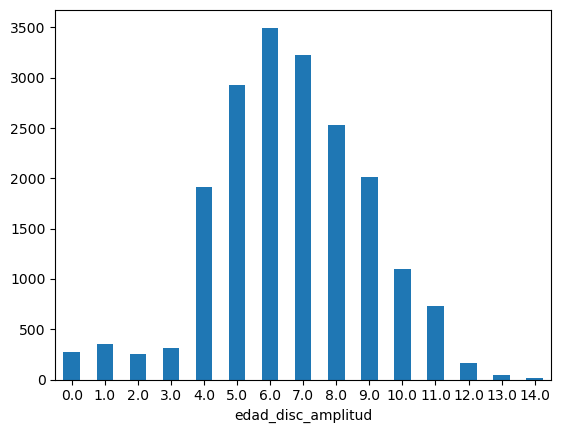

In [16]:
xs = pd.DataFrame(edad_disc_sturges)
xs.columns = ['edad_disc_amplitud']
xs.groupby('edad_disc_amplitud').size().plot(kind='bar', rot=0)

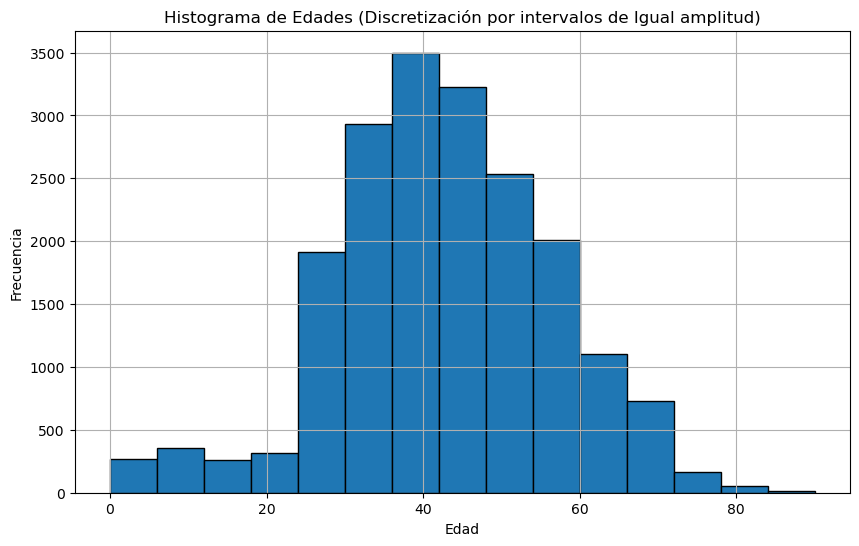

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Calcular paramaetros para igual ancho binning
n = len(df)
k = 1 + math.log2(n)
k = round(k, 0)
xmin = df.edad.min()
xmax = df.edad.max()
c = (xmax-xmin) / k

# Crear bins para el histograma
bins = [xmin + i*c for i in range(int(k) + 1)]

# Crea el histograma
plt.figure(figsize=(10,6)) # Ajusta el tamaño de figura si necesita
plt.hist(df['edad'], bins=bins, edgecolor = 'black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades (Discretización por intervalos de Igual amplitud)')
plt.grid(True)
plt.show()

In [18]:
edad_disc_sturge = pd.DataFrame(edad_disc_sturges, columns=['Edad_igual_amplitud'])
edad_disc_sturge.head()

,Edad_igual_amplitud
0,6.0
1,5.0
2,9.0
3,7.0
4,10.0


In [19]:
df2 = pd.concat([df, edad_disc_sturge], axis=1)
df2.head()

,genero,est_civil,tpers,cal,edad,clase,Edad_igual_amplitud
0,1,3,0,0,40,1,6.0
1,1,3,0,3,35,1,5.0
2,1,0,0,3,58,1,9.0
3,1,3,0,1,44,0,7.0
4,1,3,0,0,65,1,10.0


## Discretización Cuantil
Se debe dividir el rango en $k$ intervalos
* Para la construcción de los intervalos se debe tener en cuenta la discretización por cuantil
* No se utiliza la información de la clase

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

Un cuantil es un valor que divide un conjunto de datos en intervalos de igual tamaño. Los cuantiles son puntos en un conjunto de datos que ayudan a comprender la distribución de los datos

In [23]:
C_q = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [24]:
edad_disc_cuant = C_q.fit_transform(df[['edad']])

<Axes: xlabel='edad_disc_q'>

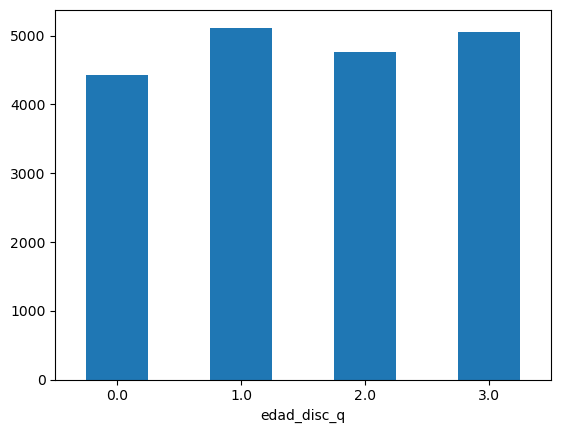

In [25]:
xq = pd.DataFrame(edad_disc_cuant) # Creamos un Df a partir de edad...
xq.columns= ['edad_disc_q'] # Establecemos lista en pandas con datos y categorias
xq.groupby('edad_disc_q').size().plot(kind='bar', rot=0) # Ploteamos a partir de agrupamiento

In [26]:
edad_disc_cuant = pd.DataFrame(edad_disc_cuant, columns=['edad_disc_cuant'])
edad_disc_cuant.head()

,edad_disc_cuant
0,1.0
1,1.0
2,3.0
3,2.0
4,3.0


In [27]:
df3 = pd.concat([df2,edad_disc_cuant], axis=1)
df3.head()

,genero,est_civil,tpers,cal,edad,clase,Edad_igual_amplitud,edad_disc_cuant
0,1,3,0,0,40,1,6.0,1.0
1,1,3,0,3,35,1,5.0,1.0
2,1,0,0,3,58,1,9.0,3.0
3,1,3,0,1,44,0,7.0,2.0
4,1,3,0,0,65,1,10.0,3.0


In [28]:
from sklearn.preprocessing import KBinsDiscretizer

In [29]:
C_kmeans = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

In [30]:
edad_disc_km = C_kmeans.fit_transform(df[['edad']])

<Axes: xlabel='edad_disc_km'>

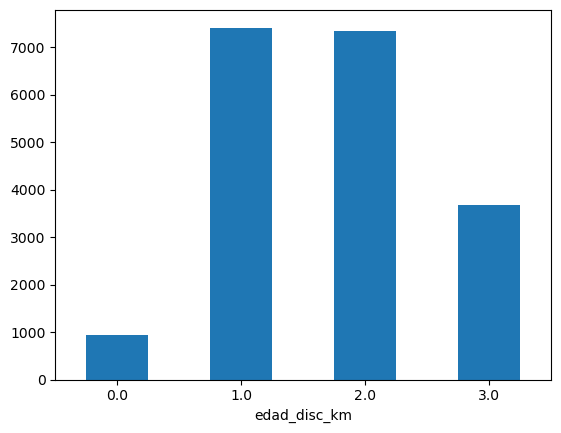

In [31]:
xkmeans = pd.DataFrame(edad_disc_km)
xkmeans.columns= ['edad_disc_km'] # Establecemos lista en pandas con datos y categorias
xkmeans.groupby('edad_disc_km').size().plot(kind='bar', rot=0) # Ploteamos a partir de agrupamiento

# Kmeans es sensible a outlayer ("Datos fuera de lugar")

Un **discretizador K-means** es un algoritmo que puede ser usado para convertir un conjunto de datos continuos en un conjunto de datos discretos. El método K-means, que tradicionalmente se utiliza para clustering (agrupamiento de datos), puede adaptarse para este propósito en situaciones donde se quiere transformar variables continuas en categorías o clases discretas.

¿Cómo funciona el discretizador K-means?
Entrada de datos continuos: Tienes un conjunto de datos en los que las variables son continuas.

Aplicación de K-means: Aplicar el algoritmo de K-means para agrupar estos datos en k clústeres. Cada clúster tiene un centro, que es el valor promedio de los puntos dentro del clúster.

Asignación de valores discretos: Una vez que los datos son agrupados en k clústeres, se pueden asignar etiquetas discretas a cada uno de los clústeres, lo que convierte las variables continuas en variables discretas.

Resultado: El conjunto de datos ahora tiene valores discretos, donde cada valor pertenece a uno de los k clústeres. Los valores continuos se han transformado en categorías basadas en la proximidad a los centros de los clústeres.

In [34]:
#conda install mdlp

^C

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [33]:
# Discretización por entropia

#from MDLP import MDLP_Discretizer

In [62]:
import pandas as pd
import numpy as np

def discretize_by_entropy(data, column_name, n_bins):

    def entropy(labels):
        _, counts = np.unique(labels, return_counts=True)
        probabilities = counts / counts.sum()
        return -np.sum(probabilities * np.log2(probabilities))

   
    def find_optimal_splits(data, column_name, n_bins):
        unique_values = np.unique(data[column_name])
        split_points = []

        if len(unique_values) <= n_bins:
            return list(unique_values)[:-1]  
            
      
        for _ in range(n_bins-1):
            best_split = -1
            max_info_gain = -1

            for i in range(len(unique_values) - 1):
                split = (unique_values[i] + unique_values[i+1])/2 # midpoint as possible split
                left_data = data[data[column_name] < split]
                right_data = data[data[column_name] >= split]

                if len(left_data) > 0 and len(right_data) > 0:
                    info_gain = entropy(data['clase']) - (len(left_data)/len(data))*entropy(left_data['clase']) - (len(right_data)/len(data))*entropy(right_data['clase'])
                    if info_gain > max_info_gain:
                        max_info_gain = info_gain
                        best_split = split

            if best_split > -1:
                split_points.append(best_split)
             
                unique_values = np.unique(data[column_name])

        return sorted(split_points)  
  
    split_points = find_optimal_splits(data, column_name, n_bins)
    data_copy = data.copy() 


    def assign_bins(age):
        for i, split_point in enumerate(split_points):
            if age < split_point:
                return i
        return len(split_points)
    data_copy[f"{column_name}_entropy_discretized"] = data[column_name].apply(assign_bins)
    return data_copy


df = pd.DataFrame({'edad':[10, 20, 30, 40, 50,60,70], 'clase':[0,1,0,1,0,1,0]})
df = discretize_by_entropy(df, 'edad', 3)
df

,edad,clase,edad_entropy_discretized
0,10,0,0
1,20,1,2
2,30,0,2
3,40,1,2
4,50,0,2
5,60,1,2
6,70,0,2
